In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape


In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape images to (num_samples, 28, 28, 1)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


In [3]:
def add_noise(images):
    noise_factor = 0.5
    noisy_images = images + noise_factor * np.random.randn(*images.shape)
    return np.clip(noisy_images, 0., 1.)  # Ensure pixel values are between 0 and 1

x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)


In [5]:
def build_autoencoder():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))  # Flatten the input
    model.add(Dense(64, activation='relu'))  # Encoder
    model.add(Dense(28 * 28, activation='sigmoid'))  # Bottleneck
    model.add(Reshape((28, 28, 1)))  # Reshape back to image
    return model

autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


In [6]:
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128, validation_data=(x_test_noisy, x_test))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0756 - val_loss: 0.0325
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0301 - val_loss: 0.0240
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0233 - val_loss: 0.0205
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0203 - val_loss: 0.0189
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0187 - val_loss: 0.0180
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0178 - val_loss: 0.0173
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0172 - val_loss: 0.0171
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0169 - val_loss: 0.0168
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0166 - val_loss: 0.0165
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0164 - val_loss: 0.0165


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step


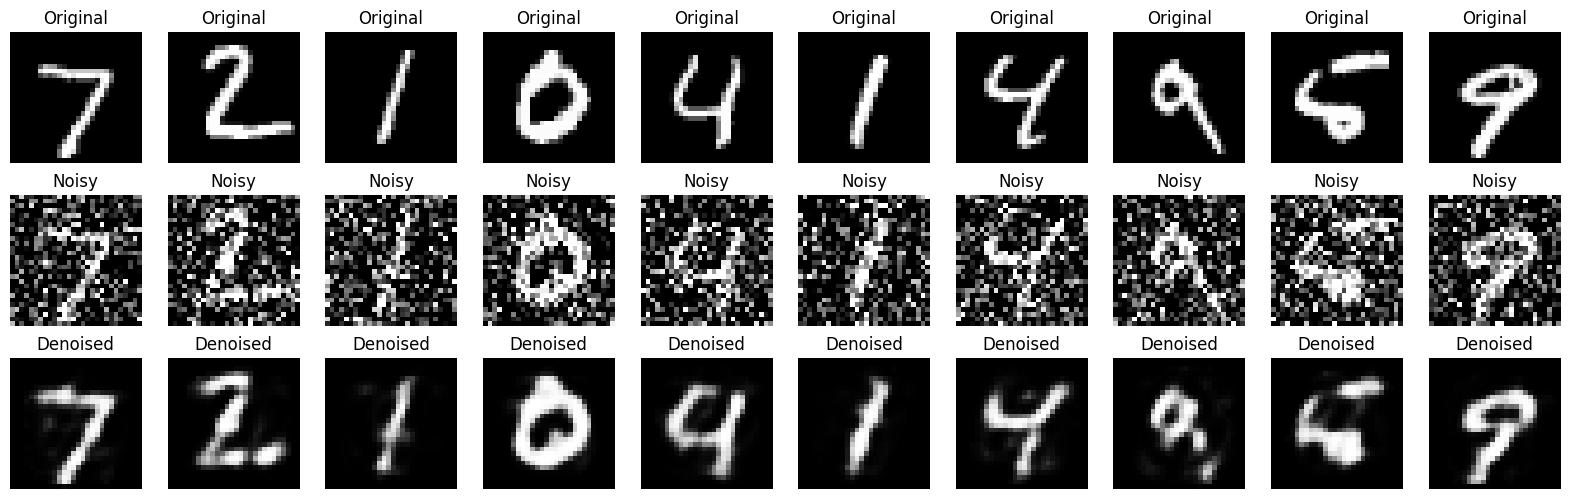

In [7]:
# Denoise the test images
denoised_images = autoencoder.predict(x_test_noisy)

# Plotting the results
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis("off")

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis("off")

plt.show()
